# Coursera
### Wesleyan University Data Analysis and Interpretation Specialization

Course 4: Machine Learning for Data Analysis<br>
Week 3: Running a Lasso Regression<br>
Author: Matt Clark


### Instructions:
<blockquote>
This week’s assignment involves running a lasso regression analysis. Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a lasso regression (copied and pasted from your program) along with corresponding output and a brief written summary. Please note that your reviewers should NOT be required to download any files in order to complete the review.

If your data set has a relatively small number of observations, you do not need to split into training and test data sets. You can provide your rationale for not splitting your data set in your written summary.
</blockquote>

### Data Preparation:

#### Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from pathlib import Path

#### Generate Dataframe.

In [2]:
root_dir = Path().resolve().parents[1]
df = pd.read_csv(str(root_dir)+'/ool_pds.csv', low_memory=False)

#### Prepare Lasso Regression Model.

In [3]:
pdf_vars = ['PPEDUCAT', 'PPETHM', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2', 'W1_F2', 'W1_F3', 'W1_F4_D', 'W1_G2', 'W1_H1', 'W1_J2', 'W1_F6']

In [4]:
p_vars = ['PPEDUCAT', 'PPETHM', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2', 'W1_F2', 'W1_F3', 'W1_F4_D', 'W1_G2', 'W1_H1', 'W1_J2']

In [5]:
t_vars = ['W1_F6',]

#### Coerce model columns to numeric type.

In [6]:
for i in df[p_vars]:
    df[i] = df[i].apply(pd.to_numeric, errors='coerce' )


#### Recode predictor variables.

In [7]:
ppeducatrecode = {1: 0, 2: 1, 3: 2, 4: 3}
df.PPEDUCAT = df.PPEDUCAT.map(ppeducatrecode)

In [8]:
ppethmrecode = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
df.PPETHM = df.PPETHM.map(ppethmrecode)

In [9]:
# W1_A1: How interested are you in what's going on in government and politics?
# 0: Not 4: very
w1a1recode = {-1: np.nan, 5: 0, 4: 1, 3: 2, 2: 3, 1: 4}
df.W1_A1 = df.W1_A1.map(w1a1recode)

In [10]:
# W1_A5A:  Who did you vote for? 0: Obama, 1: McCain
w1a5arecode = {2: 0, 1: 1, 3: np.nan, -1: np.nan}
df.W1_A5A = df.W1_A5A.map(w1a5arecode)

In [11]:
# recode W1_C1 to be a binary variable, with 0: Democrat, 1: Republican
w1c1recode = {-1: np.nan, 1: 1, 2: 0, 3: np.nan, 4: np.nan}
df.W1_C1 = df.W1_C1.map(w1c1recode)

In [12]:
# W1_C2: We hear a lot of talk these days about liberals and conservatives. Where would you
# place YOURSELF on this 7 point scale?
w1c2recode = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, -1: np.nan}
df.W1_C2 = df.W1_C2.map(w1c2recode)

In [13]:
# W1_F2: Are you optimistic/pessimistic/neither about the future of the united states.
w1f2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_F2 = df.W1_F2.map(w1f2recode)

In [14]:
# W1_F3: A basic American belief has been that if you work hard you can get ahead and reach
# the goals you set and more. Is this true or false today?
w1f3recode = {7: 0, 6: 1, 5: 2, 4: 3, 3: 4, 2: 5, 1: 6, -1: np.nan}
df.W1_F3 = df.W1_F3.map(w1f3recode)

In [15]:
# W1_F4_D :  [To become wealthy ] For yourself and people like you, how easy or hard is it to
# reach these goals?
w1f4drecode = {-1: np.nan,}
df.W1_F4_D = df.W1_F4_D.replace(w1f4drecode)

In [16]:
# W1_G2: Now thinking about the country's economy, would you say that compared to one year
# ago, the nation's economy is now better, about the same, or worse?
w1g2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_G2 = df.W1_G2.map(w1g2recode)

In [17]:
# W1_H1: Society has reached the point where Blacks and Whites have equal opportunities for
#achievement.
w1h1recode = {5: 0, 4: 1, 3: 2, 2: 3, 1: 4, -1: np.nan}
df.W1_H1 = df.W1_H1.map(w1h1recode)


In [18]:
# W1_J2: Which of the following statements comes closest to your view concerning same-sex
#couples?
w1j2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_J2 = df.W1_J2.map(w1j2recode)

#### Recode target variable.

In [19]:
w1f6recode = {-1: np.nan, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9}
df.W1_F6 = df.W1_F6.map(w1f6recode)

#### This is the DataFrame we will use for our model.

In [20]:
pdf = df[pdf_vars].copy().dropna()
predictors = pdf[p_vars]
target = pdf[t_vars]

#### Set the $\mu = 0$, $\sigma = 1$, for our predictors. Notice the suppressed error message.

In [21]:
from sklearn import preprocessing
pd.options.mode.chained_assignment = None  # default='warn'

for i in pdf.columns:
    pdf[i] = preprocessing.scale(pdf[i].astype('float64'))   

#### Train, test, split the data.

In [22]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train.values.ravel())

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))


{'PPEDUCAT': 0.523454764477243,
 'PPETHM': 0.08630876664382732,
 'W1_A1': 0.27175665736290017,
 'W1_A5A': 0.5403239530778183,
 'W1_C1': 0.0,
 'W1_C2': -0.060786632183546734,
 'W1_F2': 0.02544479786950105,
 'W1_F3': 0.13235615869655953,
 'W1_F4_D': 0.7906741469519203,
 'W1_G2': 0.06962494661467343,
 'W1_H1': 0.023837930824177303,
 'W1_J2': 0.0}

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

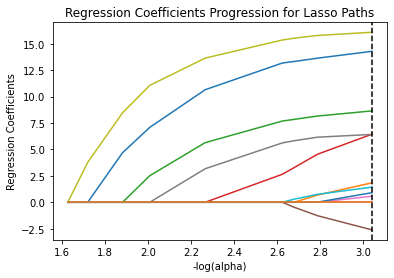

In [23]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')


In [24]:
model.cv_alphas_[0] = 0.00000001e+00 # This is a complete hack to circumvent a divide by zero error thrown by np.log10

Text(0.5, 1.0, 'Mean squared error on each fold')

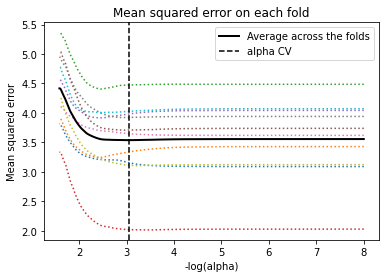

In [25]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [26]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
3.4503646075483734
test data MSE
3.4848508903902125


In [27]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.2176165445789211
test data R-square
0.1845780590124364


### Summary:

For week 3 of module 4, we continue to use the outlook on life data set. We have run a lasso regression to determine which predictor variables are most strongly associated with our target variable.
Our 13 predictor variables include Level of Education, Level of interest in government and politics, candidate voted for in the 2012 presidential election, political party affiliation, placement on a spectrum ranging between liberalism and conservativism, optimism for the future of the united states, belief that a person can work hard to get ahead, opinion on the difficulty of becoming wealthy, opinion as to whether the United States economy has improve year over year, belief that racial parity has been reached in the United States, and opinion about same sex marriage. All of these variables are categorical, or dichotomous/categorical.
Our target variable is Economic Optimism, as measured by how nearly a respondent believed they would achieve the American Dream, on a scale of 1 to 10 (recoded to range between 0 and 9).
Predictor variables were standardized to have mean $\mu = 0$, and standard deviation $\sigma = 1$.
We divided our data into a training set and a test set, containing .7 and .3 of the data, respectively.
As did the example model, we used a least angle regression algorithm with k=10 fold cross validation to estimate and test the lasso regression model.
All but 2 of our original 12 predictor variables were retained by the model, with level of education bearing the closest correspondence. The variables not retained were political party identification (democrat or republican) and opinion concerning same sex couples (which served successfully as a control variable). Identification with conservative politics varied inversely with our target. This sentiment may be explained by the time that this survey was administered (near the end of a liberal president's term.)
Our R-square term was around .2, meaning that these variables contributed to explaining 20% of the variance in the Economic Optimism variable.